### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('/content/coupons.csv')

In [3]:
data.head(2)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
missing_percentage = data.isnull().sum()*100/len(data)
missing_value_df = pd.DataFrame({'missing_count': data.isnull().sum(),'missing_percentage': missing_percentage})
missing_value_df[missing_value_df.missing_count != 0]

,missing_count,missing_percentage
car,12576,99.148534
Bar,107,0.843582
CoffeeHouse,217,1.710817
CarryAway,151,1.190476
RestaurantLessThan20,130,1.024913
Restaurant20To50,189,1.490066


from above results, it is clear that 'car' column has 99% NaN values. so it is better to drop that column.

In [5]:
data.drop('car', axis=1, inplace=True)

In [7]:
data.head(2)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0


3. Decide what to do about your missing data -- drop, replace, other...

In [8]:
duplicate = data[data.duplicated(keep='last')]
duplicate.shape

(74, 25)

there is a tiny fraction 74 out of 12.6K duplicate records. lets remove duplicates.

In [9]:
data = data.drop_duplicates()
data.shape

(12610, 25)

lets findout the unique values for int type columns.

In [10]:
data.select_dtypes('int64').nunique()

,0
temperature,3
has_children,2
toCoupon_GEQ5min,1
toCoupon_GEQ15min,2
toCoupon_GEQ25min,2
direction_same,2
direction_opp,2
Y,2


toCoupon_GEQ5min has only 1 value no matter what the 'Y' value is. so it has no bearing on Y. In other words, column 'toCoupon_GEQ5min' is not influencing the outcome ie. wheather coupon is accepted or not. so we can drop that also.

In [11]:
data.drop('toCoupon_GEQ5min', axis=1, inplace=True)

In [12]:
data.head(3)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,0,0,1,1


and also find out the missing values and fill them with most occuring value.

In [13]:
data['Bar']=data['Bar'].fillna(data['Bar'].value_counts().index[0])
data['CoffeeHouse']=data['CoffeeHouse'].fillna(data['CoffeeHouse'].value_counts().index[0])
data['CarryAway']=data['CarryAway'].fillna(data['CarryAway'].value_counts().index[0])
data['RestaurantLessThan20']=data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].value_counts().index[0])
data['Restaurant20To50']=data['Restaurant20To50'].fillna(data['Restaurant20To50'].value_counts().index[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  Bar                   12610 non-null  object
 15  CoffeeHouse           12610 non-null  obj

4. What proportion of the total observations chose to accept the coupon?



In [14]:
Y_cnts = data.groupby('Y').Y.count()
print('Accept:',Y_cnts[1],round(Y_cnts[1]/data.shape[0]*100,3),'%')
print('Reject:',Y_cnts[0],round(Y_cnts[0]/data.shape[0]*100,3),'%')

Accept: 7157 56.757 %
Reject: 5453 43.243 %


so 57% accepted , 43% rejected.

5. Use a bar plot to visualize the `coupon` column.

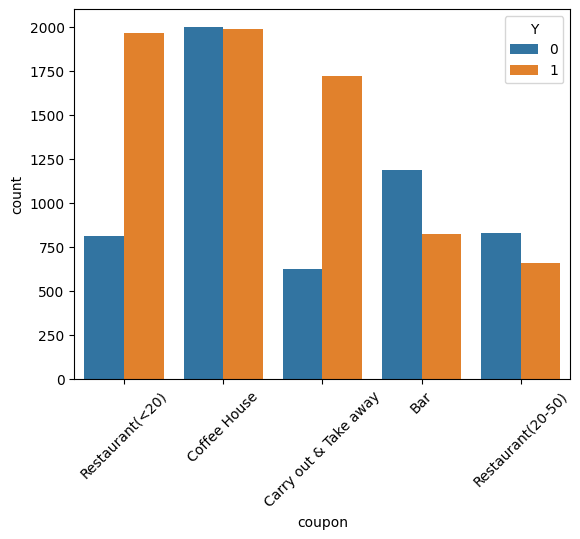

In [15]:
sns.countplot(x='coupon', hue='Y', data=data)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

Y= 1  ~  Accepted
Y= 0  ~  Not Accepted
From above we can clearly notice, coffee houses offered highest number of coupons.
But 'carry out & take away' & 'resaurant(<20)' are the ones that are accepted highest.

6. Use a histogram to visualize the temperature column.

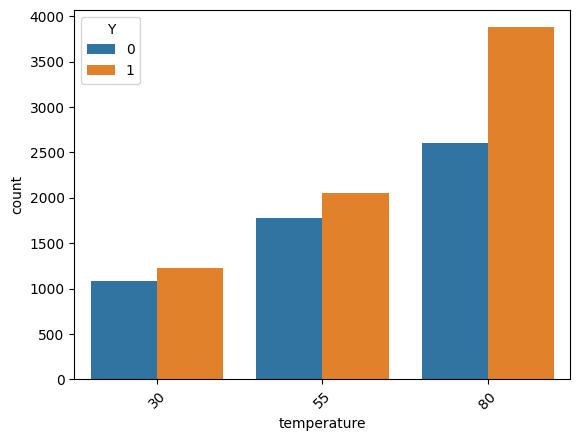

In [16]:
sns.countplot(x='temperature', hue='Y', data=data)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

coupons are accepted more when temp are in 30s & 55s.
but highest number are offered when temp are in 80s.


<Axes: xlabel='age', ylabel='Count'>

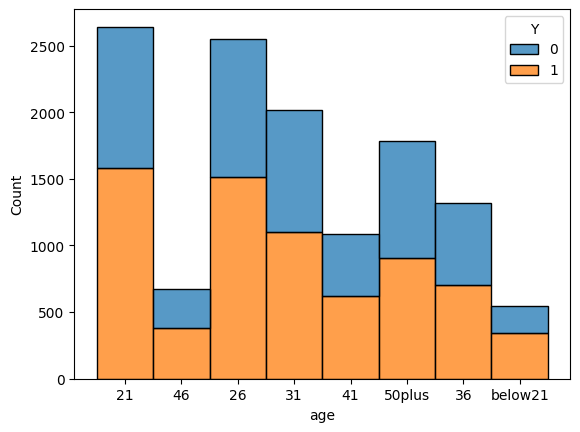

In [17]:
sns.histplot(data=data, x="age", hue="Y", multiple="stack", legend=True, stat='count')

age = 21 & 26 got highest number of coupons.
age = below 21 accepted highest number of coupons received.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [22]:
df_bar = data[data['coupon']=='Bar']
df_bar.head(3)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,1,1,0,1,0


2. What proportion of bar coupons were accepted?


In [23]:
Y_cnts = df_bar.groupby('Y').Y.count()
print('Accept:',Y_cnts[1],round(Y_cnts[1]/df_bar.shape[0]*100,3),'%')
print('Reject:',Y_cnts[0],round(Y_cnts[0]/df_bar.shape[0]*100,3),'%')

Accept: 824 40.995 %
Reject: 1186 59.005 %


bar coupons are rejected by 60%

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [24]:
df_bar['Bar'].value_counts()

,count
Bar,
never,851
less1,563
1~3,397
4~8,150
gt8,49


In [25]:
df_bar1 = df_bar[df_bar['Bar'] == 'never']
df_bar2 = df_bar[df_bar['Bar'] == 'less1']
df_bar3 = df_bar[df_bar['Bar'] == '1~3']
df_bar0_3 = pd.concat([df_bar1, df_bar2, df_bar3])
df_bar0_3.shape


(1811, 24)

In [26]:
Y_cnts = df_bar0_3.groupby('Y').Y.count()
print('Accept:',Y_cnts[1],round(Y_cnts[1]/df_bar0_3.shape[0]*100,3),'%')
print('Reject:',Y_cnts[0],round(Y_cnts[0]/df_bar0_3.shape[0]*100,3),'%')

Accept: 671 37.051 %
Reject: 1140 62.949 %


among people who went to bar 3 or less, 63% rejected it.

<Axes: xlabel='Bar', ylabel='Count'>

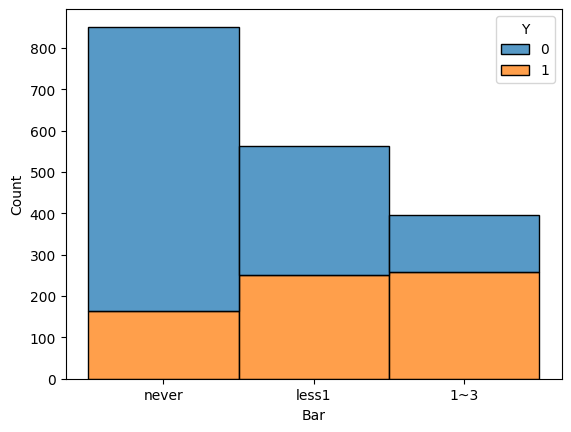

In [27]:
sns.histplot(data=df_bar0_3, x="Bar", hue="Y", multiple="stack", legend=True, stat='count')

among those who went to bar 3 or below, people who went 1~3 times used highest. People never went to bar, rejected it highest.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [34]:
df_bar_age25 = df_bar.copy()
df_bar_age25['age'] = pd.to_numeric(df_bar_age25['age'], errors='coerce')
df_bar_age25 = df_bar_age25[df_bar_age25['age'] > 25]
df_bar1 = df_bar_age25[df_bar_age25['Bar'] == '4~8']
df_bar2 = df_bar_age25[df_bar_age25['Bar'] == 'gt8']
df_bar3 = df_bar_age25[df_bar_age25['Bar'] == '1~3']

df_bar0_4 = pd.concat([df_bar1, df_bar2, df_bar3])
df_bar0_4.shape


(353, 24)

<Axes: xlabel='age', ylabel='Count'>

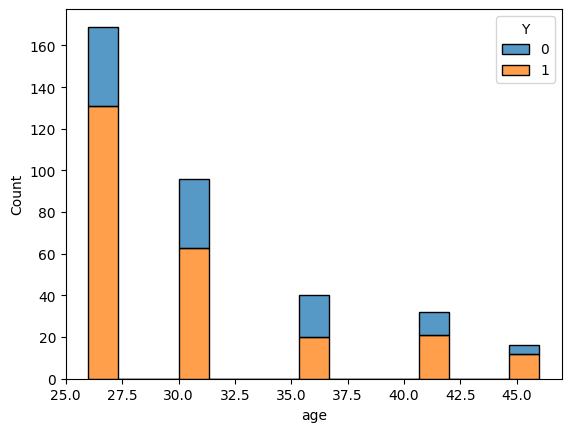

In [35]:
sns.histplot(data=df_bar0_4, x="age", hue="Y", multiple="stack", legend=True, stat='count')

people with age 26 received highest number of coupons and people with age 45 used highest percentage .

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  